## 1 Dataset Analysis

A notebook for quick and dirty analysis of the dataset.

## Setup

In [1]:
import pandas as pd

## Analysis

In [2]:
# read in modelling dataset used in models 1 and 2
df = pd.read_pickle("../2_sample_selection/data/prepared/mango_dmc_and_spectra_v2.pkl")
# df_o = df.query("outlier_flag_1 == 0")
df_o = df.query("outlier_flag_1 == 0 and subsequent_flag_1 == 0")
x_cols = df.filter(regex="^\d+", axis=1).columns
descriptive_cols = [col for col in df.columns if col not in x_cols]
df

,partition_1,outlier_flag_1,subsequent_flag_1,train_partition_1,sample_order_1,partition_ext,origin,population,date,season,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,train,0,0,calibration,28262,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train,0,0,calibration,80895,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train,0,0,calibration,31015,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train,0,0,calibration,563,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train,0,0,calibration,3737,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85396,holdout,0,0,calibration,6265,,marcelo,200800,NaT,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85397,holdout,0,0,calibration,54886,,marcelo,200800,NaT,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85398,holdout,0,0,calibration,76820,,marcelo,200800,NaT,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85399,holdout,0,0,calibration,860,,marcelo,200800,NaT,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
descriptive_cols

['partition_1',
 'outlier_flag_1',
 'subsequent_flag_1',
 'train_partition_1',
 'sample_order_1',
 'partition_ext',
 'origin',
 'population',
 'date',
 'season',
 'region',
 'cultivar',
 'physio_stage',
 'temp',
 'reference_no',
 'dry_matter',
 'instrument',
 'spectra_no']

In [4]:
# totals

samples = df.shape[0]
instruments = df["instrument"].nunique()
populations = df["population"].nunique()
seasons = df["season"].nunique()
reference_values = df["reference_no"].nunique()

print(f"Samples: {samples}")
print(f"Instruments: {instruments}")
print(f"Populations: {populations}")
print(f"Seasons: {seasons}")
print(f"Reference Values: {reference_values}")

Samples: 85401
Instruments: 31
Populations: 199
Seasons: 7
Reference Values: 10560


In [5]:
# totals without outliers

samples = df_o.shape[0]
instruments = df_o["instrument"].nunique()
populations = df_o["population"].nunique()
seasons = df_o["season"].nunique()
reference_values = df_o["reference_no"].nunique()

print(f"Samples: {samples}")
print(f"Instruments: {instruments}")
print(f"Populations: {populations}")
print(f"Seasons: {seasons}")
print(f"Reference Values: {reference_values}")

Samples: 71005
Instruments: 30
Populations: 163
Seasons: 7
Reference Values: 8712


In [6]:
# unique values
print(f'Partitions: {df["partition_1"].unique()}')
print(f'Seasons: {df["season"].unique()}')
print(f'Physio Stage: {df["physio_stage"].unique()}')
print(f'Temps: {df["temp"].unique()}')


Partitions: ['train' 'validation' 'holdout']
Seasons: [2015 2016 2017 2018 2019 2020 2021]
Physio Stage: ['green' 'ripen']
Temps: ['high' 'low' 'mid' 'undef']


In [7]:
df.query("partition_ext == 'walsh_external_val'")

,partition_1,outlier_flag_1,subsequent_flag_1,train_partition_1,sample_order_1,partition_ext,origin,population,date,season,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
74055,validation,0,2,calibration,6765,walsh_external_val,nich,112800,2019-09-17,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74056,validation,0,2,calibration,3188,walsh_external_val,nich,112800,2019-09-17,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74057,validation,0,2,calibration,73567,walsh_external_val,nich,112800,2019-09-17,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74058,validation,0,2,calibration,30436,walsh_external_val,nich,112800,2019-09-17,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74059,validation,0,2,calibration,75377,walsh_external_val,nich,112800,2019-09-17,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75810,validation,0,2,tunning,23123,walsh_external_val,nich,112900,2019-09-18,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75811,validation,0,2,calibration,79521,walsh_external_val,nich,112900,2019-09-18,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75812,validation,0,2,calibration,75587,walsh_external_val,nich,112900,2019-09-18,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75813,validation,0,2,calibration,3883,walsh_external_val,nich,112900,2019-09-18,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_o.query("instrument == 15006")

,partition_1,outlier_flag_1,subsequent_flag_1,train_partition_1,sample_order_1,partition_ext,origin,population,date,season,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,train,0,0,calibration,28262,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train,0,0,calibration,80895,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train,0,0,calibration,31015,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train,0,0,calibration,563,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train,0,0,calibration,3737,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84538,validation,0,0,tunning,13918,,marcelo,200300,NaT,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84539,validation,0,0,calibration,76125,,marcelo,200300,NaT,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84540,validation,0,0,calibration,56138,,marcelo,200300,NaT,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84541,validation,0,0,calibration,77149,,marcelo,200300,NaT,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.query("111200 <= population <= 112700").groupby(["population", "date", "region", "physio_stage", "cultivar"]).size()

population  date        region  physio_stage  cultivar
111200      2019-01-25  QLD     ripen         hg           240
111201      2019-08-29  NT      ripen         kp            72
111202      2019-09-11  NT      green         caly         632
111300      2019-02-19  QLD     ripen         hg          1200
111400      2019-02-20  QLD     ripen         hg           400
111500      2019-02-21  QLD     ripen         hg           480
111600      2019-02-22  QLD     ripen         hg           480
111800      2019-02-25  QLD     ripen         hg           480
111900      2019-02-26  QLD     ripen         hg           240
112000      2019-02-26  QLD     ripen         caly         480
112100      2019-02-27  QLD     ripen         caly         480
112200      2019-03-01  QLD     ripen         caly         480
112300      2019-03-02  QLD     ripen         caly         480
112500      2019-03-04  QLD     ripen         caly         448
112600      2019-03-06  QLD     ripen         caly         224


In [10]:
outliers = pd.merge(
    df.groupby(["partition_1"]).size().reset_index().rename(columns= {0: "samples"}),
    df.query("outlier_flag_1 == 1").groupby(["partition_1"]).size().reset_index().rename(columns= {0: "outliers"}),
    how="outer"
).fillna(0)
outliers["pct"] = outliers["outliers"]/outliers["samples"] * 100
outliers

,partition_1,samples,outliers,pct
0,holdout,5842,264,4.519000
1,train,57822,1131,1.956003
2,validation,21737,2066,9.504531


In [11]:
df.query("outlier_flag_1 == 0").groupby(["season"]).size().reset_index().rename(columns={0: "samples"})

,season,samples
0,2015,14865
1,2016,14583
2,2017,26022
3,2018,12432
4,2019,5265
5,2020,4438
6,2021,554


In [24]:
df.query("outlier_flag_1 == 2").groupby(["population"]).size().reset_index()

,population,0
0,101700,61
1,102100,58
2,102400,125
3,104100,98
4,104200,126
5,106100,472
6,107000,281
7,112000,337
8,112100,271
9,112200,162


In [13]:
df.query("population in [111200, 111300, 111400, 111500, 111600, 111800, 111900, 112000, 112100, 112200, 112300, 112400, 112500, 112600, 112700]").groupby(["outlier_flag_1"]).size()

outlier_flag_1
0    4309
1    1661
2    1974
dtype: int64

In [14]:
1661/(4309 + 1661 + 1974)

0.20908862034239678

In [15]:
# number of instruments not in each set 
train_instruments = (
    # df_o.query("partition_1 == 'training'")
    df_o.query("partition_1 == 'training' or partition_1 == 'validation'")
    .groupby(["instrument"])
    .size()
    .reset_index()
)["instrument"].to_list()
train_instruments


len(df_o.query(f"partition_1 == 'holdout' and instrument not in {train_instruments}").groupby(["instrument"]).size())

4

In [16]:
df_o.query("subsequent_flag_1 != 0").groupby(["subsequent_flag_1"]).size()

Series([], dtype: int64)

In [17]:
df_o.query("partition_ext == 'walsh_external_val'")

,partition_1,outlier_flag_1,subsequent_flag_1,train_partition_1,sample_order_1,partition_ext,origin,population,date,season,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200


In [18]:
df.groupby(["population", "season", "date", "region", "physio_stage", "cultivar", "instrument"]).size()

population  season  date        region  physio_stage  cultivar  instrument
100100      2015    2015-09-27  NT      green         caly      15006         160
                                                                15014         160
                                                                15016         160
100200      2015    2015-10-02  NT      green         caly      15006          80
                                                                15014         160
                                                                             ... 
122100      2021    2021-09-09  NT      ripen         r2e2      20013          24
122200      2021    2021-09-17  NT      green         r2e2      15014          72
122300      2021    2021-10-01  NT      green         kp        15014          80
122400      2021    2021-10-22  QLD     green         hg        15029          80
                                                                16041          80
Length: 817, dtype: int

## Tables and Figures for Publication  

In [19]:
import pandas as pd
import numpy as np


# Unique counts and size
instruments = df["instrument"].nunique()
populations = df["population"].nunique()
reference_no = df["reference_no"].nunique()
spectra_no = df.shape[0]
outliers_removed = df.query("outlier_flag_1 != 0").shape[0]
outliers_2_removed = df.query("subsequent_flag_1 != 0").shape[0]

# Mean and standard deviation of dry matter
dm_mean = df["dry_matter"].mean()
dm_stdev = df["dry_matter"].std()

# Mean and standard deviation for unique references
unique_refs = df.drop_duplicates(subset=["reference_no"])
dm_mean_unique_ref = unique_refs["dry_matter"].mean()
dm_stdev_unique_ref = unique_refs["dry_matter"].std()

# Assemble into a DataFrame
table_1 = pd.DataFrame({
    "instruments": [instruments],
    "populations": [populations],
    "reference_no": [reference_no],
    "spectra_no": [spectra_no],
    "outliers_removed": [outliers_removed],
    "dm_mean": [dm_mean],
    "dm_stdev": [dm_stdev],
    "dm_mean_unique_ref": [dm_mean_unique_ref],
    "dm_stdev_unique_ref": [dm_stdev_unique_ref],
    "outliers_2_removed": [outliers_2_removed]
})

table_1


,instruments,populations,reference_no,spectra_no,outliers_removed,dm_mean,dm_stdev,dm_mean_unique_ref,dm_stdev_unique_ref,outliers_2_removed
0,31,199,10560,85401,7242,15.892963,2.467451,16.017812,2.587213,7612


In [20]:
df.columns

Index(['partition_1', 'outlier_flag_1', 'subsequent_flag_1',
       'train_partition_1', 'sample_order_1', 'partition_ext', 'origin',
       'population', 'date', 'season',
       ...
       '1173', '1176', '1179', '1182', '1185', '1188', '1191', '1194', '1197',
       '1200'],
      dtype='object', length=324)

In [21]:
# instruments and samples per x
group = ["partition_ext",]


# group = ["partition_1", "season"]
table_1 = pd.merge(
    left=df.groupby(group)["instrument"].nunique().reset_index(name=f"instruments"),
    right=df.groupby(group)["population"].nunique().reset_index(name=f"populations"), 
    on=group,
    how="left"
).merge(
    right=df.groupby(group)["reference_no"].nunique().reset_index(name=f"reference_no"),
    on=group,
    how="left"
).merge(
    right=df.groupby(group).size().reset_index(name="spectra_no"),
    on=group,
    how="left"
).merge(
    right=df.query("outlier_flag_1 != 0").groupby(group).size().reset_index(name="outliers_removed"), 
    on=group,
    how="left"
).merge(
    right=df.query("subsequent_flag_1 != 0 and outlier_flag_1 == 0").groupby(group).size().reset_index(name="subsequent_flagged"), 
    on=group,
    how="left"
).merge(
    right=df.groupby(group)["dry_matter"].mean().reset_index(name="dm_mean"),
    on=group,
    how="left"
).merge(
    right=df.groupby(group)["dry_matter"].std().reset_index(name="dm_stdev"),
    on=group,
    how="left"
).merge(
    right=df.drop_duplicates(subset=["reference_no"]).groupby(group)["dry_matter"].mean().reset_index(name="dm_mean_unique_ref"),
    on=group,
    how="left"
).merge(
    right=df.drop_duplicates(subset=["reference_no"]).groupby(group)["dry_matter"].std().reset_index(name="dm_stdev_unique_ref"),
    on=group,
    how="left"
).fillna(0)
table_1


,partition_ext,instruments,populations,reference_no,spectra_no,outliers_removed,subsequent_flagged,dm_mean,dm_stdev,dm_mean_unique_ref,dm_stdev_unique_ref
0,,31,197,9836,83633,7242.0,6675,15.871687,2.461727,15.937394,2.577700
1,anderson_external_val,1,18,725,1448,0.0,159,17.015330,2.669516,17.013702,2.669858
2,walsh_external_val,1,2,160,320,0.0,320,16.374682,1.656909,16.374682,1.659513


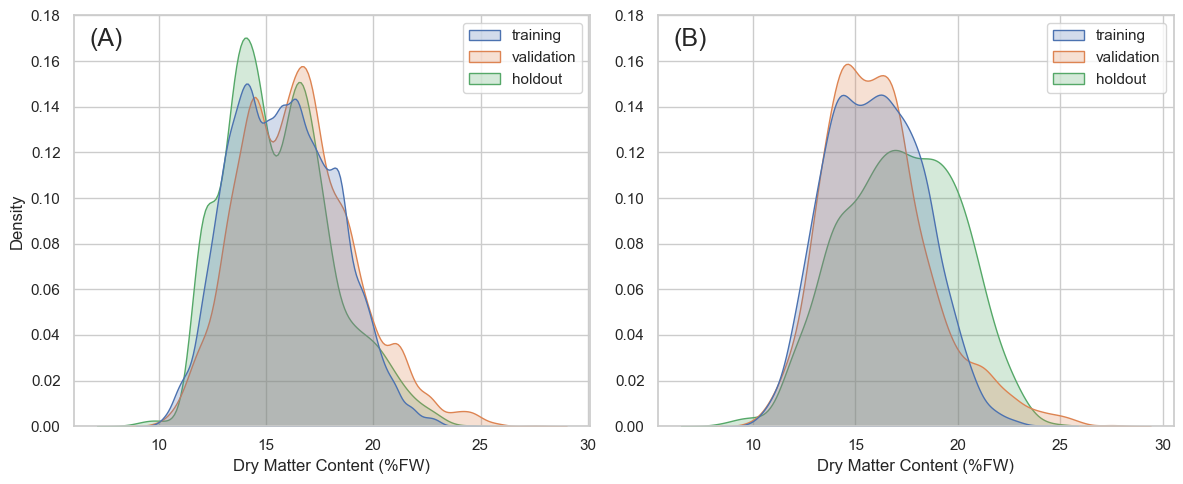

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df_o.loc[df_o["partition_1"] == 'train', "partition_1"] = "training"

# Create a figure with 2 subplots side by side
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Plot the first set of data on the first subplot
sns.kdeplot(data=df_o, x="dry_matter", hue="partition_1", fill=True, ax=axs[0], palette="deep", common_norm=False)
axs[0].set_xlabel("Dry Matter Content (%FW)")
axs[0].set_ylabel("Density")
axs[0].legend_.set_title(None)
axs[0].set_ylim(0, 0.18)

# Plot the second set of data on the second subplot
df_unique_ref = df_o.drop_duplicates(subset=["reference_no"])
sns.kdeplot(data=df_unique_ref, x="dry_matter", hue="partition_1", fill=True, ax=axs[1], palette="deep", common_norm=False)
axs[1].set_xlabel("Dry Matter Content (%FW)")
axs[1].set_ylabel(None)
axs[1].legend_.set_title(None)
axs[1].set_ylim(0, 0.18)

axs[0].text(0.03, 0.97, '(A)', transform=axs[0].transAxes, fontsize=18, verticalalignment='top')
axs[1].text(0.03, 0.97, '(B)', transform=axs[1].transAxes, fontsize=18, verticalalignment='top')
# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [22]:
df_o.groupby("partition_1")["dry_matter"].max()

partition_1
holdout       24.888968
training      24.577150
validation    27.809347
Name: dry_matter, dtype: float64

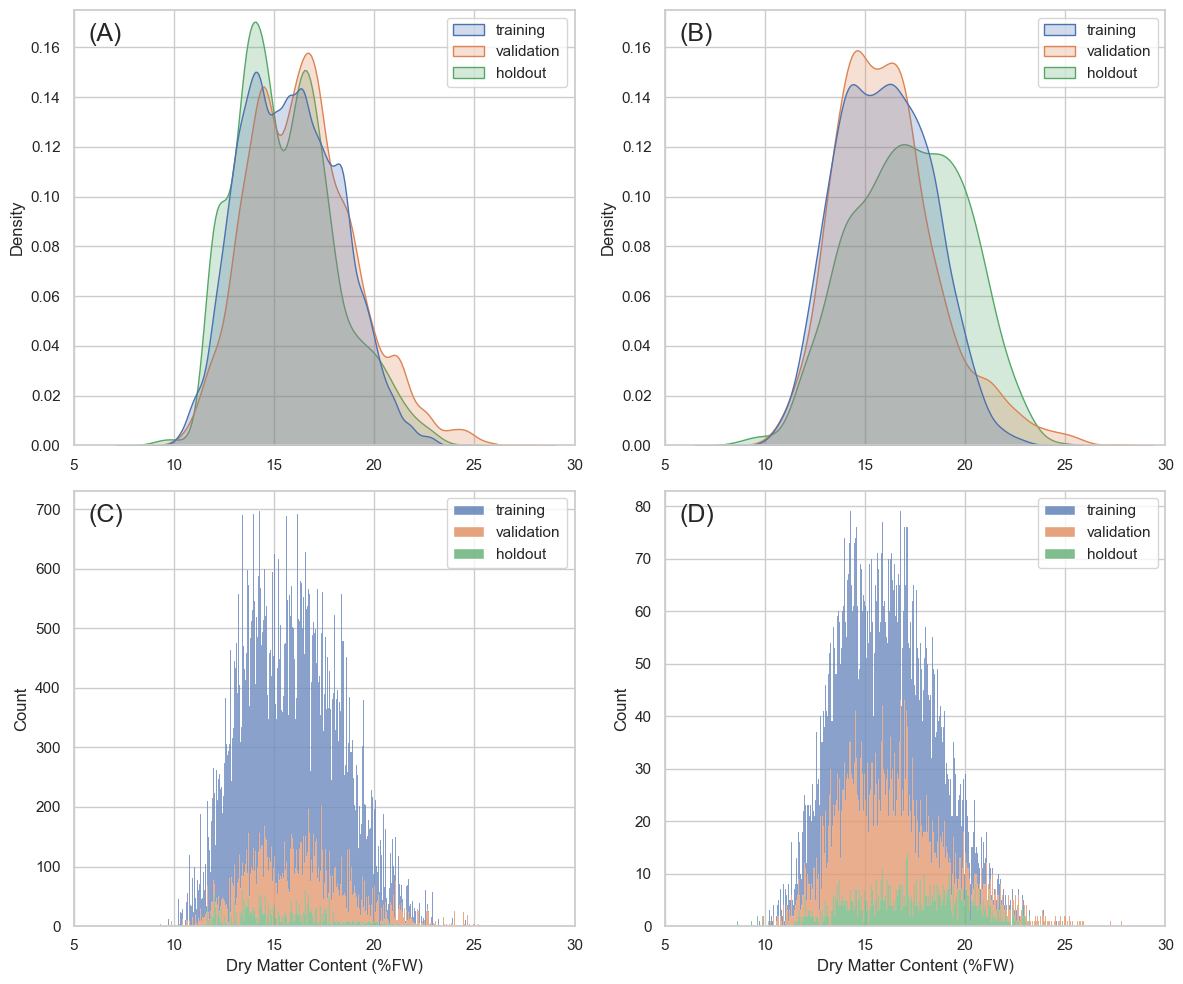

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_o is your DataFrame
df_o.loc[df_o["partition_1"] == 'train', "partition_1"] = "training"

# Create a figure with 4 subplots arranged in a 2x2 grid
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Original density plots
# First density plot
sns.kdeplot(data=df_o, x="dry_matter", hue="partition_1", fill=True, ax=axs[0, 0], palette="deep", common_norm=False, bw_adjust=1)
# axs[0, 0].set_xlabel("Dry Matter Content (%FW)")
axs[0, 0].set_ylabel("Density")
axs[0, 0].legend_.set_title(None)
axs[0, 0].set_ylim(0, 0.175)
axs[0, 0].text(0.03, 0.97, '(A)', transform=axs[0, 0].transAxes, fontsize=18, verticalalignment='top')
axs[0, 0].set_xlim(5, 30)
axs[0, 0].set_xlabel(None)

# Second density plot
df_unique_ref = df_o.drop_duplicates(subset=["reference_no"])
sns.kdeplot(data=df_unique_ref, x="dry_matter", hue="partition_1", fill=True, ax=axs[0, 1], palette="deep", common_norm=False, bw_adjust=1)
# axs[0, 1].set_xlabel("Dry Matter Content (%FW)")
axs[0, 1].set_ylabel("Density")
axs[0, 1].legend_.set_title(None)
axs[0, 1].set_ylim(0, 0.175)
axs[0, 1].text(0.03, 0.97, '(B)', transform=axs[0, 1].transAxes, fontsize=18, verticalalignment='top')
axs[0, 1].set_xlim(5, 30)
axs[0, 1].set_xlabel(None)

# Modified count plots
bins = np.arange(7, 27 + 1, 0.05)
# First count plot
sns.histplot(data=df_o, x="dry_matter", hue="partition_1", kde=False, multiple="stack", ax=axs[1, 0], palette="deep", bins=bins)
axs[1, 0].set_xlabel("Dry Matter Content (%FW)")
axs[1, 0].set_ylabel("Count")
axs[1, 0].legend_.set_title(None)
axs[1, 0].text(0.03, 0.97, '(C)', transform=axs[1, 0].transAxes, fontsize=18, verticalalignment='top')
axs[1, 0].set_xlim(5, 30)

# Second count plot
sns.histplot(data=df_unique_ref, x="dry_matter", hue="partition_1", kde=False, multiple="stack", ax=axs[1, 1], palette="deep", bins=bins)
axs[1, 1].set_xlabel("Dry Matter Content (%FW)")
axs[1, 1].set_ylabel("Count")
axs[1, 1].legend_.set_title(None)
axs[1, 1].text(0.03, 0.97, '(D)', transform=axs[1, 1].transAxes, fontsize=18, verticalalignment='top')
axs[1, 1].set_xlim(5, 30)

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


In [30]:
sample_counts = df_o.pivot_table(index=["season"], columns="instrument", values="spectra_no", aggfunc="count").fillna(0)
columns = sample_counts.columns.tolist()
columns[0], columns[1] = columns[1], columns[0]
sample_counts = sample_counts[columns]
sc_instrument = sample_counts

sample_counts = df_o.pivot_table(index=["season"], columns="population", values="spectra_no", aggfunc="count").fillna(0)
columns = sample_counts.columns.tolist()
columns[0], columns[1] = columns[1], columns[0]
sample_counts = sample_counts[columns]
sc_population = sample_counts

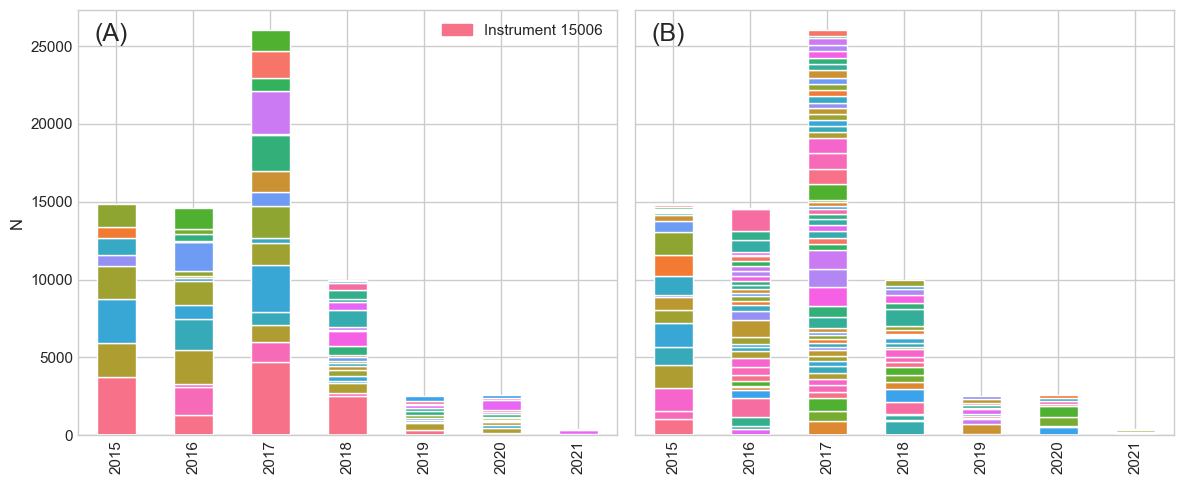

In [31]:
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

palette_1 = sns.color_palette("husl", len(sc_instrument.columns))
np.random.seed(6)
np.random.shuffle(palette_1)

palette_2 = sns.color_palette("husl", len(sc_instrument.columns))
np.random.seed(6)
np.random.shuffle(palette_2)

sc_instrument.plot(kind='bar', stacked=True, color=palette_1, ax=axs[0], legend=False, )
sc_population.plot(kind='bar', stacked=True, color=palette_2, ax=axs[1], legend=False, )

# ax.set_xlabel('Season')
axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[0].set_ylabel('N')

from matplotlib.patches import Patch
legend_label = "Instrument 15006"
legend_patch = Patch(color=palette_1[0], label=legend_label)
axs[0].legend(handles=[legend_patch])

axs[0].text(0.03, 0.97, '(A)', transform=axs[0].transAxes, fontsize=18, verticalalignment='top')
axs[1].text(0.03, 0.97, '(B)', transform=axs[1].transAxes, fontsize=18, verticalalignment='top')

plt.tight_layout()
plt.show()